### Backpropagation란?
- 인공신경망에서 가중치 업데이트를 위해 사용하는 알고리즘
- 학습 과정에서 발생하는 오차를 역전파하여 각 노드의 가중치를 조정하는 방법
- Backpropagation은 주로 경사하강법과 함께 사용되어서, 네트워크의 출력값과 실제값 사이의 차이(오차)를 최소화하는 데 중점

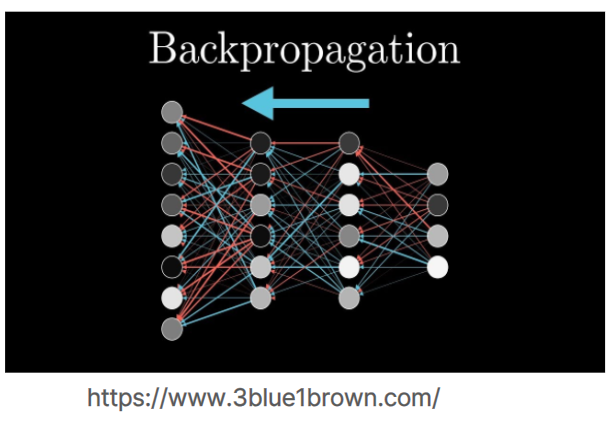

### 연쇄 법칙 (Chain Rule)

- 연쇄 법칙은 함수 $y = f(g(x)) $의 미분을 구할 때 사용
- $y $가 $( u = g(x) $)라는 중간 변수를 거쳐 계산된다고 생각하면, 연쇄 법칙에 의해 다음과 같이 표현

$$
\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
$$

즉, $ y $를 $u $에 대해 미분하고, 이를 $u $를 $ x $에 대해 미분한 값과 곱

## 다층 신경망에서의 연쇄 법칙

- 다층 신경망에서는 여러 층을 거쳐 입력값이 출력값으로 변환됩니다. 각 층의 출력을 다음 층의 입력으로 사용하는 방식으로 네트워크가 구성
- 이를 연쇄 법칙을 통해 미분하면, 네트워크의 출력에 대한 각 가중치의 기울기를 계산 가능

### 예제: 두 개의 은닉층을 가진 신경망

- 입력 $x $가 첫 번째 은닉층, 두 번째 은닉층을 거쳐 출력 $ y $로 변환되는 신경망을 생각해보기

1. **첫 번째 층**:
   $$
   Z_1 = W_1 \cdot X + b_1
   $$
   $$
   A_1 = f(Z_1)
   $$

2. **두 번째 층**:
   $$
   Z_2 = W_2 \cdot A_1 + b_2
   $$
   $$
   A_2 = f(Z_2)
   $$

3. **출력층**:
   $$
   Z_3 = W_3 \cdot A_2 + b_3
   $$
   $$
   \hat{Y} = A_3 = f(Z_3)
   $$

출력 $\hat{Y}$와 실제값 $Y$ 사이의 손실 함수 $L$를 정의하면, 각 가중치에 대한 기울기를 연쇄 법칙을 통해 계산할 수 있음

### 역전파를 통한 기울기 계산

각 층에서의 기울기를 연쇄 법칙을 사용해 계산합니다. 마지막 층부터 역순으로 계산

1. **출력층에서의 기울기**:
   $$
   \frac{\partial L}{\partial Z_3} = \frac{\partial L}{\partial \hat{Y}} \cdot \frac{\partial \hat{Y}}{\partial Z_3}
   $$
   $$
   \frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial Z_3} \cdot \frac{\partial Z_3}{\partial W_3}
   $$
   $$
   \frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial Z_3}
   $$

2. **두 번째 은닉층에서의 기울기**:
   $$
   \frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial Z_3} \cdot \frac{\partial Z_3}{\partial A_2} \cdot \frac{\partial A_2}{\partial Z_2}
   $$
   $$
   \frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial W_2}
   $$
   $$
   \frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial Z_2}
   $$

3. **첫 번째 은닉층에서의 기울기**:
   $$
   \frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial A_1} \cdot \frac{\partial A_1}{\partial Z_1}
   $$
   $$
   \frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial Z_1} \cdot \frac{\partial Z_1}{\partial W_1}
   $$
   $$
   \frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial Z_1}
   $$

In [1]:
import numpy as np

# ReLU 함수와 그 미분 함수 정의
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 초기 가중치와 편향 설정
def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)  # 재현성을 위해 시드 설정
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# 순전파 함수
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)  # 여기서는 회귀 문제를 위해 활성화 함수 사용 안함
    return Z1, A1, Z2, A2

# 역전파 함수
def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2

# 가중치 업데이트 함수
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# 비용 함수 (MSE)
def compute_cost(A2, Y):
    m = Y.shape[0]
    cost = (1/m) * np.sum((A2 - Y)**2)
    return cost

# 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 3)  # 입력 데이터
Y = np.random.rand(100, 1)  # 출력 데이터

# 모델 초기화
input_size = X.shape[1]
hidden_size = 5
output_size = Y.shape[1]
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

# 하이퍼파라미터 설정
learning_rate = 0.01
iterations = 1000

# 경사하강법을 이용한 학습
for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
    dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2)
    W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    if i % 100 == 0:
        cost = compute_cost(A2, Y)
        print(f"Iteration {i}, Cost: {cost}")

# 최종 비용 출력
final_cost = compute_cost(A2, Y)
print(f"Final Cost: {final_cost}")

Iteration 0, Cost: 0.29617825471294423
Iteration 100, Cost: 0.1526954144570859
Iteration 200, Cost: 0.1361997979546046
Iteration 300, Cost: 0.12646802945091323
Iteration 400, Cost: 0.11914873921362253
Iteration 500, Cost: 0.11360293902089341
Iteration 600, Cost: 0.1093644928277771
Iteration 700, Cost: 0.10602391756213714
Iteration 800, Cost: 0.10337393702103817
Iteration 900, Cost: 0.1013015366442789
Final Cost: 0.09960295067283231
